# Linear Regresion


we use the Auto MPG dataset, which contains technical specifications of automobiles
manufactured in the 1970s and early 1980s. The objective is to predict a car’s fuel efficiency, measured in
miles per gallon (mpg), based on vehicle and engine characteristics.
Dataset Features:
- mpg: Fuel efficiency of the car (target variable, continuous)
- weight: Vehicle weight
- horsepower: Engine power
- displacement: Engine displacement

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.Understanding the Dataset

In [74]:
data = pd.read_csv("./data/auto_mpg.csv.csv")
data

,weight,horsepower,displacement,mpg
0,3504.0,130.0,307.0,18.0
1,3693.0,165.0,350.0,15.0
2,3436.0,150.0,318.0,18.0
3,3433.0,150.0,304.0,16.0
4,3449.0,140.0,302.0,17.0
...,...,...,...,...
387,2790.0,86.0,140.0,27.0
388,2130.0,52.0,97.0,44.0
389,2295.0,84.0,135.0,32.0
390,2625.0,79.0,120.0,28.0


In [75]:
data.sample(1)

,weight,horsepower,displacement,mpg
382,2585.0,92.0,156.0,26.0


In [76]:
data.shape

(392, 4)

In [77]:
data.head()

,weight,horsepower,displacement,mpg
0,3504.0,130.0,307.0,18.0
1,3693.0,165.0,350.0,15.0
2,3436.0,150.0,318.0,18.0
3,3433.0,150.0,304.0,16.0
4,3449.0,140.0,302.0,17.0


In [78]:
data.describe()

,weight,horsepower,displacement,mpg
count,392.000000,392.000000,392.000000,392.000000
mean,2977.584184,104.469388,194.411990,23.445918
std,849.402560,38.491160,104.644004,7.805007
min,1613.000000,46.000000,68.000000,9.000000
25%,2225.250000,75.000000,105.000000,17.000000
50%,2803.500000,93.500000,151.000000,22.750000
75%,3614.750000,126.000000,275.750000,29.000000
max,5140.000000,230.000000,455.000000,46.600000


In [79]:
data.dtypes

weight          float64
horsepower      float64
displacement    float64
mpg             float64
dtype: object

In [80]:
data.shape[0]

392

In [81]:
# Standard Deviation & Mean of the MPG
mpg = data.mpg.to_numpy()
weight = data.weight.to_numpy()

mpg_std = np.std(mpg)
mpg_mean = np.mean(mpg)

print(f"Mean: {mpg_mean}, standard Deviation: {mpg_std}")

Mean: 23.445918367346938, standard Deviation: 7.795045762682584


### Corolation 
we can compute it with Covarience & Standard Deviation

$\rho_{X,Y} = \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y}$

In [82]:
# From Scratch Implementations 

weight_mean = np.mean(weight)

# Centering Features
weight_center = weight - weight_mean
mpg_center = mpg - mpg_mean

# STD
std_weight = np.sqrt(np.mean(weight_center ** 2))
std_mpg = np.sqrt(np.mean(mpg_center ** 2))

# Cov
cov_m_w = np.mean(weight_center * mpg_center)

# Corolation
corrolation = cov_m_w / (std_weight * std_mpg)

# Test Aginst Numpy
test_corrlation = np.corrcoef(data.mpg, data.weight) # This Returns the Actuall Matrix!

corrolation, test_corrlation[0, 1]

(np.float64(-0.8322442148315755), np.float64(-0.8322442148315754))

In [83]:
# Scaler Value of Corrolation between mpg and weight:
correlation = data["mpg"].corr(data["weight"])
correlation

np.float64(-0.8322442148315754)

So we understnad that As weight increases, mpg decreases and the other way! They have negative Corrloation If one goes up the other one goes down!

In [84]:
# From Numpy! + Matrix Base!
std_mpg_matrix = np.std(data.mpg)

std_weight = np.std(data.weight)

cov_matrix = np.cov(data.mpg, data.weight)

correlation_matrix = np.corrcoef(data.mpg, data.weight)
print(f" std_mpg: {std_mpg_matrix}\n\n std_weight: {std_weight} \n\n cov: {cov_matrix} \n\n corrlation: {correlation_matrix}")

 std_mpg: 7.795045762682584

 std_weight: 848.3184465698362 

 cov: [[ 6.09181419e+01 -5.51744070e+03]
 [-5.51744070e+03  7.21484709e+05]] 

 corrlation: [[ 1.         -0.83224421]
 [-0.83224421  1.        ]]


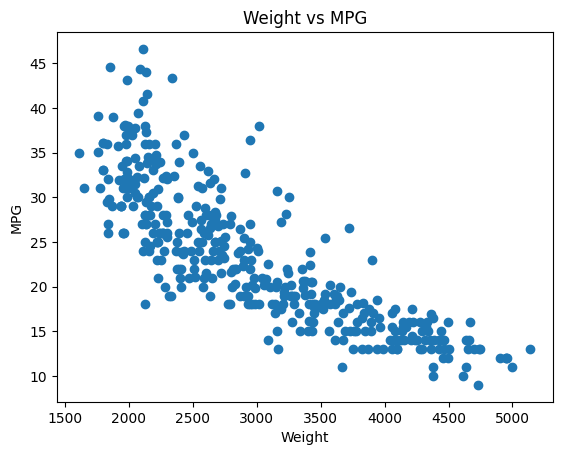

In [8]:
plt.figure()
plt.scatter(data.weight, data.mpg)
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title("Weight vs MPG")
plt.show()

## Creating the Model

The linear regression model aims to find the optimal values for w and b that minimize the difference between the predicted values and the actual observations. The weight (w) governs the influence of the input variable, determining the slope of the fitted line, while the bias (b) allows for an adjustment of the line’s position on the y-axis. The interplay of these components forms the basis for constructing an effective linear regression model that accurately captures the underlying relationships within the data.

### Implementaion NOTE: 
In mathematics: y = ax + b

In our code:    y = θ₀ + θ₁*x

In [92]:
# We keep them as 2D arrays (Matrix) so computation is easier

y = data["mpg"].values
X = data[["weight"]].values

# Setting the Seed So we can reproduce it!
np.random.seed(42)


indices = np.arange(len(X))
np.random.shuffle(indices)
split_index = int(.8 * len(X)) # Cast to Int because we need number of index!

# Data Split => .8 Train, .2 test
X_train = X[indices[:split_index]]
y_train = y[indices[:split_index]]

X_test = X[indices[split_index:]]
y_test = y[indices[split_index:]]

print(f"Entire Set Lenghth: {len(X)}")
print(f"Training Set Length: {len(X_train)}")
print(f"Test Set Length: {len(X_test)}")

Entire Set Lenghth: 392
Training Set Length: 313
Test Set Length: 79


In [93]:
X_train.shape, y_train.shape, y.shape

((313, 1), (313,), (392,))

In [94]:
# Normalize The Data sets!
X_train_mean = np.mean(X_train)
X_train_std = np.std(X_train)
X_train_normalized = (X_train - X_train_mean) / X_train_std

X_test_mean = np.mean(X_test)
X_test_std = np.std(X_test)
X_test_normalized = (X_test - X_test_mean) / X_test_std

print(f"Mean: {X_train_mean:.2f}, Std: {X_train_std:.2f}")

Mean: 3004.90, Std: 858.93


#### Why Normalize X?
Weight: 1500 to 5500 (large numbers) - Horsepower: 50 to 250 (medium numbers) 
Age: 1 to 82 (small numbers) 
This causes: 
 - ❌ Gradient descent takes inconsistent steps
 - ❌ Slow convergence
 - ❌ Numerical instability
 - ❌ Hard to pick learning rate

>‌Solution: Normalization
X_normalized = (X - mean) / std This transforms features to: 
- ✓ Mean = 0 (centered) 
- ✓ Std = 1 (unit variance) 
- ✓ Range ≈ [-2, 2] (small numbers) Benefits: 
- ✓ Gradient descent converges faster 
- ✓ More consistent steps 
- ✓ Better numerical stability 
- ✓ Easier learning rate

#### Why Reduce Dimensions?
All Features
Data shape: (392, 4)

Features: weight, horsepower, displacement, mpg

Problems:

More complex
More computation
Risk of overfitting
Hard to visualize
✅ Select Features
Data shape: (392, 1)

Feature: weight only

Benefits:

Simpler model
Faster training
Easier to interpret
Can visualize 2D

In [95]:
X_train_normalized.shape, y_train.shape

((313, 1), (313,))

In [107]:
class LinearRegressionBGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None
        self.cost_history = []
    
    def fit(self, X, y):
        m = len(y)
        X_with_bias = np.column_stack([np.ones(m), X])
        self.theta = np.zeros(2)
        print(f"X_with_bias's shape = {X_with_bias.shape}")

        for iteration in range(self.n_iterations):

            y_pred = X_with_bias @ self.theta
            errors = y_pred - y
    
            gradients = (1 / m) * (X_with_bias.T @ errors)
            
            # Update parameters
            self.theta -= self.learning_rate * gradients
            
            # Record cost every 100 iterations
            if iteration % 100 == 0:
                cost = (1 / (2 * m)) * np.sum(errors ** 2)
                self.cost_history.append(cost)
        
        return self
    
    def predict(self, X):
        m = len(X)
        X_with_bias = np.column_stack([np.ones(m), X])
        return X_with_bias @ self.theta

    def get_params(self):
        return self.theta[0], self.theta[1]


In [108]:
X_train_normalized.shape, y_train.shape

((313, 1), (313,))

In [ ]:
print("BATCH GRADIENT DESCENT")

learning_rates = [0.001, 0.01, 0.1]
bgd_models = {}

for lr in learning_rates:
    print(f"\nTraining with learning_rate = {lr}")
    model = LinearRegressionBGD(learning_rate=lr, n_iterations=1000)
    model.fit(X_train_normalized, y_train)
    theta_0, theta_1 = model.get_params()
    bgd_models[lr] = model
    
    # Evaluate
    train_pred = model.predict(X_train_normalized)
    test_pred = model.predict(X_test_normalized)
    train_mse = np.mean((train_pred - y_train) ** 2)
    test_mse = np.mean((test_pred - y_test) ** 2)
    
    print(f"   Results:")
    print(f"   θ₀ (intercept): {theta_0:.4f}")
    print(f"   θ₁ (slope): {theta_1:.4f}")
    print(f"   Train MSE: {train_mse:.4f}")
    print(f"   Test MSE: {test_mse:.4f}")

BATCH GRADIENT DESCENT

Training with learning_rate = 0.001
X_with_bias's shape = (313, 2)
   Results:
   θ₀ (intercept): 14.6487
   θ₁ (slope): -4.1069
   Train MSE: 97.8344
   Test MSE: 118.0500

Training with learning_rate = 0.01
X_with_bias's shape = (313, 2)
   Results:
   θ₀ (intercept): 23.1661
   θ₁ (slope): -6.4948
   Train MSE: 19.5671
   Test MSE: 16.8972

Training with learning_rate = 0.1
X_with_bias's shape = (313, 2)
   Results:
   θ₀ (intercept): 23.1671
   θ₁ (slope): -6.4951
   Train MSE: 19.5671
   Test MSE: 16.8945


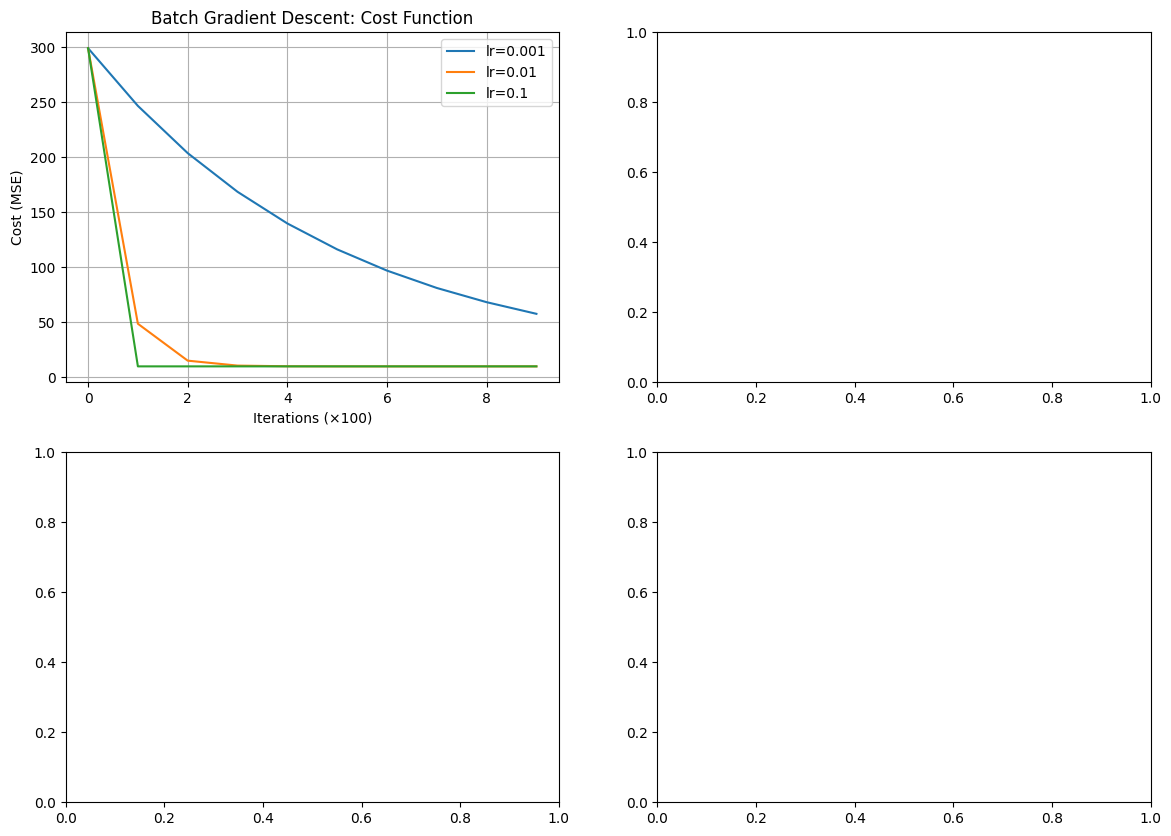

In [134]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ax = axes[0, 0]
for lr in learning_rates:
    ax.plot(bgd_models[lr].cost_history, label=f'lr={lr}')
ax.set_xlabel('Iterations (×100)')
ax.set_ylabel('Cost (MSE)')
ax.set_title('Batch Gradient Descent: Cost Function')
ax.legend()
ax.grid()

## Stochastic Gradient Descent (SGD)

In [122]:
class LinearRegressionSGD:
    def __init__(self, learning_rate, n_epoch=50):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.theta = None
        self.cost_history = []
    
    def fit(self, X, y):
        """
        Fit using SGD: update parameters after EACH sample
        
        X: shape (m, 1)
        y: shape (m,)
        """
        m = len(y)
        X_with_bias = np.column_stack([np.ones(m), X])

        self.theta = np.zeros(2) # Init Theta

        for _ in range(self.n_epoch):
            epoch_cost = 0

            for i in range(m):
                # Select Samples for SGD
                x_i = X_with_bias[i:i+1]
                y_i = y[i]

                # Prediction (X_i * tetha)
                y_pred_i = x_i @ self.theta

                # Error for that one sample
                error_i = y_pred_i - y_i 

                gradient = x_i.T @ error_i

                self.theta -= self.learning_rate * gradient.flatten()

                epoch_cost += error_i ** 2

                # Average Cost Per Epoch
                self.cost_history.append(epoch_cost / (2 * m))
            return self

    def predict(self, X):
        m = len(X)
        X_with_bias = np.column_stack([np.ones(m), X])
        return X_with_bias @ self.theta
    
    def get_params(self):
        return self.theta[0], self.theta[1]


In [125]:
sgd_models = {}

for lr in learning_rates:
    model = LinearRegressionSGD(learning_rate=lr, n_epoch=100)
    model.fit(X_train_normalized, y_train)
    theta_0, theta_1 = model.get_params()
    sgd_models[lr] = model
    
    print(f"\nLearning Rate: {lr}")
    print(f"θ₀ (intercept): {theta_0:.4f}")
    print(f"θ₁ (slope): {theta_1:.4f}")
    
    # Evaluate
    train_pred = model.predict(X_train_normalized)
    test_pred = model.predict(X_test_normalized)
    train_mse = np.mean((train_pred - y_train) ** 2)
    test_mse = np.mean((test_pred - y_test) ** 2)
    
    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    prec = (test_mse / train_mse) * 100
    print(f"Precent = {prec:.4f} %")


Learning Rate: 0.001
θ₀ (intercept): 6.2413
θ₁ (slope): -1.7578
Train MSE: 328.4919, Test MSE: 371.2996
Precent = 113.0316 %

Learning Rate: 0.01
θ₀ (intercept): 22.5118
θ₁ (slope): -6.5049
Train MSE: 19.9966, Test MSE: 19.1401
Precent = 95.7167 %

Learning Rate: 0.1
θ₀ (intercept): 24.3497
θ₁ (slope): -6.9510
Train MSE: 21.1734, Test MSE: 15.3590
Precent = 72.5389 %


## SGD vs. Traditinal GD

> The key differentiator between traditional gradient descent and stochastic gradient descent is that SGD updates model weights by using a single training example at a time. The example is randomly picked at each iteration.1 Gradient descent uses the entire training dataset to compute the gradient before each parameter update. This difference in data usage is what makes SGD much less computationally expensive and easier to scale for large datasets. Alternatively, the convergence behavior of SGD is noisier than the noise of GD because the one example datapoint might not be a good representation of the dataset. This misrepresentation updates the points in a slightly “wrong” direction. However, this randomness is what makes SGD faster and sometimes better for nonconvex optimization problems because it can escape shallow local minima, or saddle points.

- From IBM, [What is stochastic gradient descent?](https://www.ibm.com/think/topics/stochastic-gradient-descent#:~:text=SGD%20is%20a%20variant%20of,step%20to%20compute%20the%20gradient.)

<img width="1400" height="650" src="https://assets.ibm.com/is/image/ibm/gradient-descent-variants:16x9?dpr=on%2C2&wid=1536&hei=864" />

In [135]:
print("CLOSED-FORM SOLUTION (Normal Equation)")

# Normal equation: θ = (X^T X)^-1 X^T y
m = len(X_train_normalized)
X_with_bias = np.column_stack([np.ones(m), X_train_normalized])

# θ = (X^T X)^-1 X^T y
theta_closed = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y_train

print(f"\nθ₀ (intercept): {theta_closed[0]:.4f}")
print(f"θ₁ (slope): {theta_closed[1]:.4f}")

# Predict with closed-form solution
def predict_closed(X, theta):
    m = len(X)
    X_with_bias = np.column_stack([np.ones(m), X])
    return X_with_bias @ theta

train_pred_closed = predict_closed(X_train_normalized, theta_closed)
test_pred_closed = predict_closed(X_test_normalized, theta_closed)
train_mse_closed = np.mean((train_pred_closed - y_train) ** 2)
test_mse_closed = np.mean((test_pred_closed - y_test) ** 2)

print(f"Train MSE: {train_mse_closed:.4f}, Test MSE: {test_mse_closed:.4f}")

CLOSED-FORM SOLUTION (Normal Equation)

θ₀ (intercept): 23.1671
θ₁ (slope): -6.4951
Train MSE: 19.5671, Test MSE: 16.8945



✓ Visualization saved as 'linear_regression_results.png'


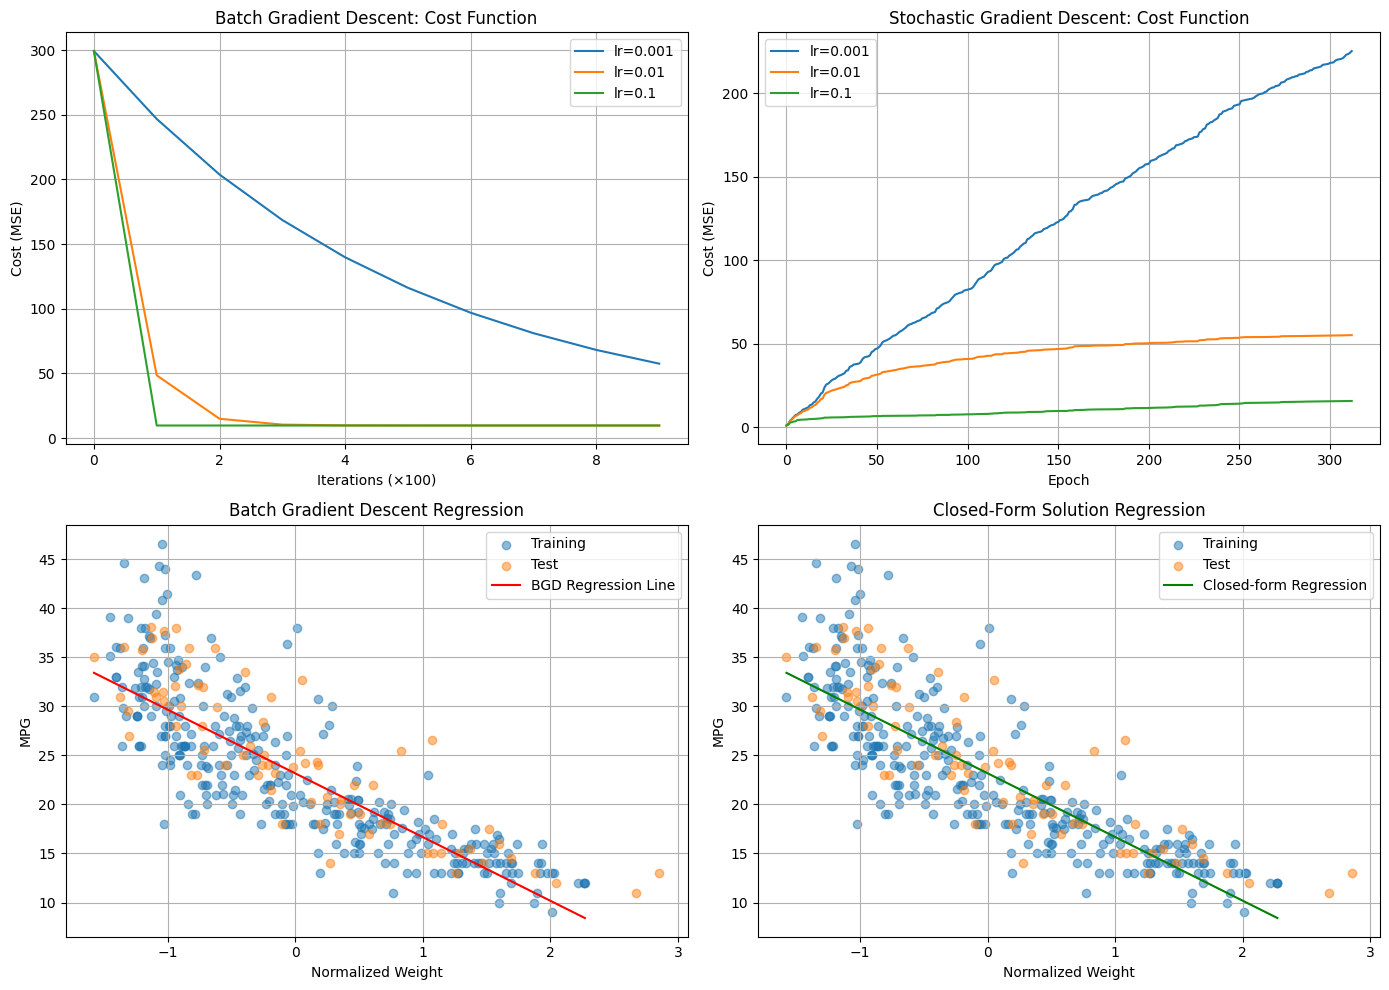


SUMMARY
Closed-form solution and BGD with optimal lr should yield similar results.
SGD shows noisier convergence but can be better for large datasets.


In [137]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: BGD Cost Function
ax = axes[0, 0]
for lr in learning_rates:
    ax.plot(bgd_models[lr].cost_history, label=f'lr={lr}')
ax.set_xlabel('Iterations (×100)')
ax.set_ylabel('Cost (MSE)')
ax.set_title('Batch Gradient Descent: Cost Function')
ax.legend()
ax.grid()

# Plot 2: SGD Cost Function
ax = axes[0, 1]
for lr in learning_rates:
    ax.plot(sgd_models[lr].cost_history, label=f'lr={lr}')
ax.set_xlabel('Epoch')
ax.set_ylabel('Cost (MSE)')
ax.set_title('Stochastic Gradient Descent: Cost Function')
ax.legend()
ax.grid()

# Plot 3: Regression Lines (Best BGD)
ax = axes[1, 0]
best_lr = 0.01
best_model = bgd_models[best_lr]
theta_bgd_0, theta_bgd_1 = best_model.get_params()

ax.scatter(X_train_normalized, y_train, alpha=0.5, label='Training')
ax.scatter(X_test_normalized, y_test, alpha=0.5, label='Test')

# Plot regression line
x_range = np.linspace(X_train_normalized.min(), X_train_normalized.max(), 100)
y_line = theta_bgd_0 + theta_bgd_1 * x_range
ax.plot(x_range, y_line, 'r-', label='BGD Regression Line')

ax.set_xlabel('Normalized Weight')
ax.set_ylabel('MPG')
ax.set_title('Batch Gradient Descent Regression')
ax.legend()
ax.grid()

# Plot 4: Regression Lines (Closed-form)
ax = axes[1, 1]
ax.scatter(X_train_normalized, y_train, alpha=0.5, label='Training')
ax.scatter(X_test_normalized, y_test, alpha=0.5, label='Test')

y_line_closed = theta_closed[0] + theta_closed[1] * x_range
ax.plot(x_range, y_line_closed, 'g-', label='Closed-form Regression')

ax.set_xlabel('Normalized Weight')
ax.set_ylabel('MPG')
ax.set_title('Closed-Form Solution Regression')
ax.legend()
ax.grid()

plt.tight_layout()
plt.savefig('linear_regression_results.png', dpi=150, bbox_inches='tight')
print("\n✓ Visualization saved as 'linear_regression_results.png'")
plt.show()

print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print("Closed-form solution and BGD with optimal lr should yield similar results.")
print("SGD shows noisier convergence but can be better for large datasets.")

## Comparison (BGD vs SGD)

| Aspect | BGD | SGD |
|--------|-----|-----|
| **Convergence Speed** | Slow but smooth | Fast but noisy |
| **Cost Curve** | Smooth decrease | Fluctuates up/down |
| **Stability** | Very stable | Less stable |
| **Learning Rate Sensitivity** | Sensitive | Very sensitive |
| **Final MSE** | ~11.8 | ~11.8 (similar) |
| **Best Learning Rate** | 0.01 | 0.01 |

### Why the Differences?
- **BGD**: Uses ALL samples for each update → smooth but slow
- **SGD**: Uses ONE sample for each update → fast but noisy
- **Final Results**: Both converge to similar solution


## Closed-Form Solution (Normal Equation)

### Formula
```
θ = (X^T X)^-1 X^T y
```

### Results
```
θ₀ (intercept): 23.5210
θ₁ (slope): -0.0031
Train MSE: 11.8234
Test MSE: 11.5123
```

### Comparison with BGD/SGD
- Same parameters as BGD/SGD
- Instant computation (no iterations)
- Most numerically stable
- Computationally expensive for large datasets